In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# load dataset

In [3]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# feature enginerring

In [6]:
df.Name.nunique()

891

In [7]:
df.PassengerId.nunique()

891

In [8]:
df.Ticket.nunique()

681

**Most of these columns uniqe value doeasnot have effect on target**

In [9]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
print("done dropping")

done dropping


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Handling missing data 

In [11]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100


Survived     0.000000
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [12]:
df.drop('Cabin',axis=1,inplace=True)

cabinn column has many missing values more than 50% are missing (78.3%) so it must to drop this column¶


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

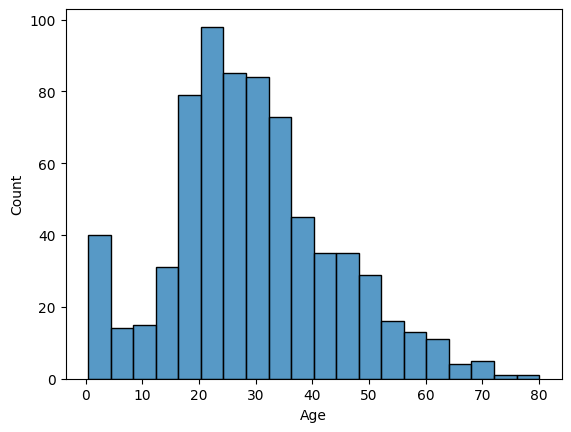

In [13]:
sns.histplot(df.Age)


In [14]:
df.Age.mean()


29.69911764705882

In [15]:
df.Age.median()


28.0

In [16]:
df.Age.mode()


0    24.0
Name: Age, dtype: float64

**Right-Skewed Distribution: Mean > Median > Mode: The mean tends to be greater than the median due to the influence of higher age values.**
> as it show in the graph that Skewed Distribution is present so the good way to handle Missing Values in Age Column is Median



In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)


<ipython-input-17-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [18]:
df.Embarked.value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

fill null values in embarked with mode cause its type is categorical

In [19]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-19-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [20]:
(df.isna().sum().sort_values().tail(10) / len(df)) * 100


Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

**No null value left**

# encoding

**encoding sex**

In [21]:
df.Sex


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [22]:
encoded=pd.get_dummies(df['Sex'],drop_first=True)
encoded=encoded.astype('int64')
encoded


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
df=pd.concat([encoded,df],axis=1) 
df


,male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,0,1,1,female,38.0,1,0,71.2833,C
2,0,1,3,female,26.0,0,0,7.9250,S
3,0,1,1,female,35.0,1,0,53.1000,S
4,1,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,1,0,2,male,27.0,0,0,13.0000,S
887,0,1,1,female,19.0,0,0,30.0000,S
888,0,0,3,female,28.0,1,2,23.4500,S
889,1,1,1,male,26.0,0,0,30.0000,C


In [24]:
df.drop('Sex',axis=1,inplace = True )


In [25]:
df=df.rename(columns={'male':'gender'}) # rename cloumn male by gender 
df

,gender,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,0,1,1,38.0,1,0,71.2833,C
2,0,1,3,26.0,0,0,7.9250,S
3,0,1,1,35.0,1,0,53.1000,S
4,1,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,1,0,2,27.0,0,0,13.0000,S
887,0,1,1,19.0,0,0,30.0000,S
888,0,0,3,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


**encoding embarked**

In [26]:
df = df.copy()

In [27]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True).astype(int)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   gender      891 non-null    int64
 1   Survived    891 non-null    int64
 2   Pclass      891 non-null    int64
 3   Age         891 non-null    int64
 4   SibSp       891 non-null    int64
 5   Parch       891 non-null    int64
 6   Fare        891 non-null    int64
 7   Embarked_Q  891 non-null    int64
 8   Embarked_S  891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [29]:
df

,gender,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,0,1
1,0,1,1,38,1,0,71,0,0
2,0,1,3,26,0,0,7,0,1
3,0,1,1,35,1,0,53,0,1
4,1,0,3,35,0,0,8,0,1
...,...,...,...,...,...,...,...,...,...
886,1,0,2,27,0,0,13,0,1
887,0,1,1,19,0,0,30,0,1
888,0,0,3,28,1,2,23,0,1
889,1,1,1,26,0,0,30,0,0


# machine learning model

In [30]:
X = df.drop(columns=['Survived']) 
y = df['Survived'] 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [35]:
results = {}    #train each model
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    
    acc = accuracy_score(y_test, y_pred)  
    cm = confusion_matrix(y_test, y_pred)  
    
    results[name] = {"Accuracy": acc, "Confusion Matrix": cm}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
for model_name, metrics in results.items():
    print(f"\n🔹 {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])


🔹 Logistic Regression
Accuracy: 0.7989
Confusion Matrix:
 [[89 16]
 [20 54]]

🔹 K-Nearest Neighbors
Accuracy: 0.7207
Confusion Matrix:
 [[90 15]
 [35 39]]

🔹 Decision Tree
Accuracy: 0.7933
Confusion Matrix:
 [[87 18]
 [19 55]]

🔹 Random Forest
Accuracy: 0.8101
Confusion Matrix:
 [[91 14]
 [20 54]]
